In [14]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# Define dataset path
dataset_path = r"C:\Users\HP\Documents\breast cancer\archive\Dataset_BUSI_with_GT"

# Define categories
categories = ['normal', 'benign', 'malignant']

# Load images and labels
data = []
labels = []

img_size = 128  # Resize images to 128x128

for category in categories:
    path = os.path.join(dataset_path, category)
    class_num = categories.index(category)  # Assign numeric label
    
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        image = cv2.resize(image, (img_size, img_size))
        data.append(image)
        labels.append(class_num)

# Convert to numpy arrays
data = np.array(data).reshape(-1, img_size, img_size, 1)  # Reshape for CNN
labels = np.array(labels)

# Normalize pixel values
data = data / 255.0

# One-hot encode labels
labels = to_categorical(labels, num_classes=3)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [16]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,451 (12.61 MB)

 Trainable params: 3,304,451 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.5177 - loss: 1.0142 - val_accuracy: 0.6297 - val_loss: 0.7215
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.5957 - loss: 0.8354 - val_accuracy: 0.7405 - val_loss: 0.6340
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.6727 - loss: 0.7179 - val_accuracy: 0.7025 - val_loss: 0.6731
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.6582 - loss: 0.7036 - val_accuracy: 0.7215 - val_loss: 0.6236
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6633 - loss: 0.6971 - val_accuracy: 0.7658 - val_loss: 0.5558
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.6786 - loss: 0.6513 - val_accuracy: 0.6804 - val_loss: 0.6350
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6609 - loss: 0.6949 - val_accuracy: 0.7848 - val_loss: 0.5365
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.7038 - loss: 0.6239 - val_accuracy: 0.

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7257 - loss: 0.5885
Test Accuracy: 74.37%


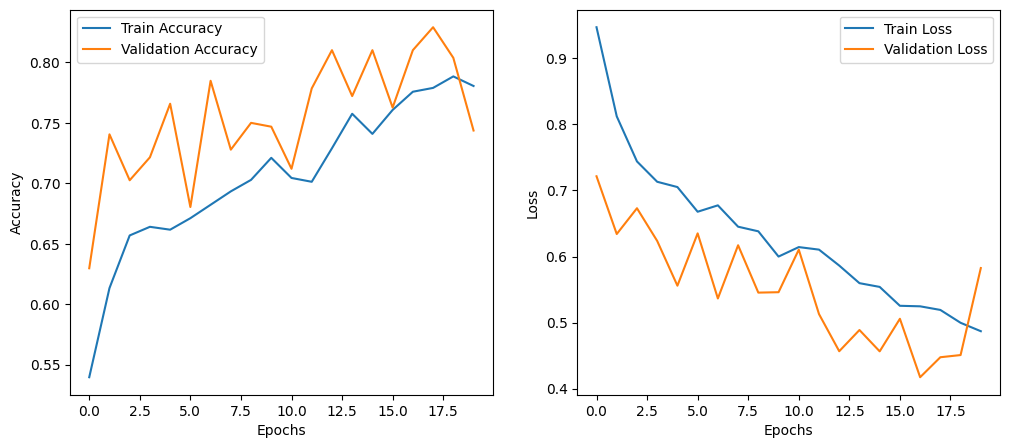

In [21]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:







import cv2
import numpy as np

# Define categories (Make sure these match the dataset labels)
categories = ["Normal", "Benign", "Malignant"]
img_size = 128  # Must match training size

def predict_image(image_path, model, threshold=0.6):
    if not os.path.exists(image_path):
        print(f"❌ Image not found: {image_path}")
        return None
    
    # Load and preprocess image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("❌ Failed to load image. Check file format.")
        return None

    # Resize and normalize
    image = cv2.resize(image, (img_size, img_size))
    image = image.reshape(1, img_size, img_size, 1) / 255.0

    # Predict
    prediction = model.predict(image)
    
    # Debugging: Print raw model output
    print(f"📊 Raw Prediction Probabilities: {prediction}")

    # Use confidence threshold
    class_index = np.argmax(prediction)
    confidence = prediction[0][class_index]
    
    if confidence < threshold:
        print("⚠️ Model is unsure about the prediction.")
        return "Uncertain"

    return categories[class_index]

# Example prediction
image_path = r"C:\Users\HP\Documents\breast cancer\archive\Dataset_BUSI_with_GT\normal\normal (4)_mask.png"
predicted_class = predict_image(image_path, model)

if predicted_class:
    print(f"✅ Predicted Class: {predicted_class}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
📊 Raw Prediction Probabilities: [[9.9648619e-01 3.5082714e-03 5.6236240e-06]]
✅ Predicted Class: Normal


In [23]:
test_image_path = r"C:\Users\HP\Documents\breast cancer\archive\Dataset_BUSI_with_GT\benign\benign (1)_mask.png"
correct_label = "Benign"  # Adjust based on the actual image label

predicted_label = predict_image(test_image_path, model)
print(f"Expected: {correct_label}, Predicted: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
📊 Raw Prediction Probabilities: [[1.9679903e-13 9.9344158e-01 6.5584243e-03]]
Expected: Benign, Predicted: Benign


In [12]:
import tensorflow as tf

# Save the trained model in HDF5 format
model.save(r"C:\Users\HP\Documents\breast cancer\model.h5")
print("✅ Model saved successfully as model.h5!")


✅ Model saved successfully as model.h5!


print("Model Input Shape:", model.input_shape)


In [13]:
print("Model Input Shape:", model.input_shape)


Model Input Shape: (None, 128, 128, 1)
